<a href="https://colab.research.google.com/github/jentrasakti/JentraSaktiAnandaPurba/blob/main/tugasdaun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [111]:
ls

 gmb/                         'tugas 1'/  'tugas2 (1).ipynb'   Untitled0.ipynb
 IMG_20200814_131721_HDR.jpg  'tugas 2'/   tugas2.ipynb


In [112]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [113]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("gmb")
data = []
labels = []

[INFO] loading images...


In [114]:
for imagePath in imagePaths:
	image = Image.open(imagePath)
 
  #preprocessing

	image = np.array(image.resize((111,111))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [115]:
print(labels)

['GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05',

In [116]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [117]:
print(labels)

[[0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 ...
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]


In [118]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(444, 111, 111, 3)
(149, 111, 111, 3)


In [119]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(16, (5,5), activation='relu', input_shape=(111,111,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(32, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(32, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))

#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 107, 107, 16)      1216      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 53, 53, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 51, 51, 16)        2320      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 23, 23, 32)        4640      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 9, 9, 32)         

In [120]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [121]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=30, batch_size=32)

Epoch 1/30
14/14 [==============================] - 5s 325ms/step - loss: 1.6064 - accuracy: 0.2140 - val_loss: 1.5862 - val_accuracy: 0.3020
Epoch 2/30
14/14 [==============================] - 4s 313ms/step - loss: 1.5438 - accuracy: 0.3401 - val_loss: 1.5067 - val_accuracy: 0.4161
Epoch 3/30
14/14 [==============================] - 4s 316ms/step - loss: 1.4014 - accuracy: 0.3919 - val_loss: 1.4164 - val_accuracy: 0.3826
Epoch 4/30
14/14 [==============================] - 4s 315ms/step - loss: 1.3545 - accuracy: 0.4572 - val_loss: 1.3822 - val_accuracy: 0.4295
Epoch 5/30
14/14 [==============================] - 4s 313ms/step - loss: 1.2317 - accuracy: 0.4955 - val_loss: 1.3324 - val_accuracy: 0.4765
Epoch 6/30
14/14 [==============================] - 4s 317ms/step - loss: 1.1207 - accuracy: 0.5450 - val_loss: 1.2876 - val_accuracy: 0.5101
Epoch 7/30
14/14 [==============================] - 4s 313ms/step - loss: 1.0496 - accuracy: 0.5991 - val_loss: 1.1692 - val_accuracy: 0.4698
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


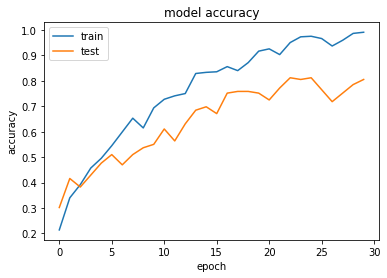

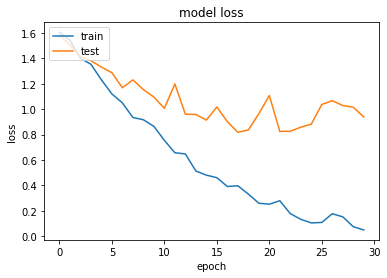

In [122]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [123]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.84      0.93      0.89        29
      GMB_04       0.80      0.80      0.80        35
      GMB_05       0.77      0.71      0.74        28
      GMB_07       0.81      0.75      0.78        28
      GMB_10       0.80      0.83      0.81        29

    accuracy                           0.81       149
   macro avg       0.80      0.80      0.80       149
weighted avg       0.80      0.81      0.80       149



In [124]:
model1.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [127]:
import cv2
import matplotlib.pyplot as plt
image1='IMG_20200814_131721_HDR.jpg'

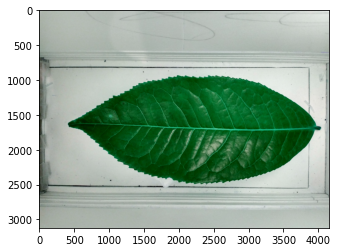

In [128]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [129]:
image_testing = Image.open('IMG_20200814_131721_HDR.jpg')
image_testing = np.array(image_testing.resize((111, 111))) / 255.0
image_testing.shape

(111, 111, 3)

In [130]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 111, 111, 3)


In [131]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[0.0009264  0.01085655 0.00629464 0.17911947 0.8028029 ]]
['GMB_10']
